<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/NLP_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Emotion Detection

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

## Update

In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade scikit-learn
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Import

In [2]:
import re
import string
from shutil import unpack_archive
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


# Dataset Overview

## Reading Datasets

In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/Learning Course/DTS PROA - ML with Tensorflow/Exercise/Week 6 - NLP/train.txt',
                         names=['text','emotion'], sep=';')
data_val = pd.read_csv('/content/drive/MyDrive/Learning Course/DTS PROA - ML with Tensorflow/Exercise/Week 6 - NLP/val.txt',
                         names=['text','emotion'], sep=';')
data_test = pd.read_csv('/content/drive/MyDrive/Learning Course/DTS PROA - ML with Tensorflow/Exercise/Week 6 - NLP/test.txt',
                         names=['text','emotion'], sep=';')

In [4]:
data_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
data_val.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
data_test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


## Cleansing

- Remove non-alphabetical characters
- Convert the text to lower case
- Remove stopwords

In [7]:
stop = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [8]:
def clean(text):
  global stop
  global word_lemmatizer

  # remove non-alphabetical characters
  text = re.sub(r'[^a-zA-Z ]', '', text)

  # lower case
  text = text.lower()

  # remove stopwords
  text = ' '.join(word for word in text.split() if word not in stop)

  # lemmatization
  text = ''.join(wordnet_lemmatizer.lemmatize(word) for word in text)

  return text

In [9]:
X_train = data_train['text'].apply(clean)
y_train = data_train['emotion']

X_test = data_test['text'].apply(clean)
y_test = data_test['emotion']

X_val = data_val['text'].apply(clean)
y_val = data_val['emotion']

In [10]:
data_train['text'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [11]:
X_train.head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

## Class Distribution

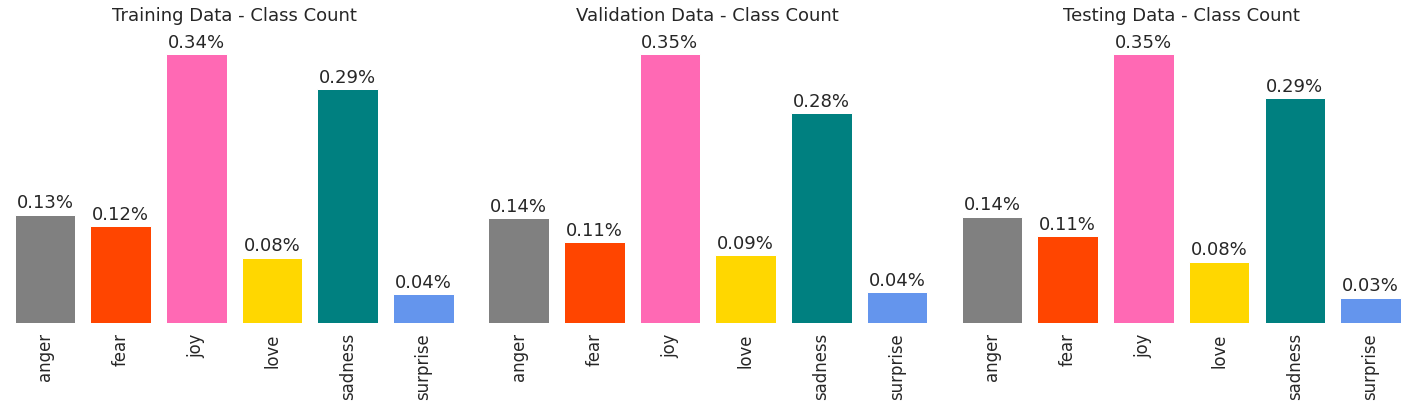

In [12]:
colors = ['gray', 'orangered', 'hotpink', 'gold', 'teal', 'cornflowerblue']
_, ax = plt.subplots(1,3,figsize=(20,6))
# _, ax = plt.subplots(3,1,figsize=(6,12))

tmp = y_train.value_counts(normalize=True)
tmp.sort_index(inplace=True)
sns.barplot(x=tmp.index, y=tmp.values, palette=colors, saturation=1, ax=ax[0])
ax[0].set_title('Training Data - Class Count', pad=20)

tmp = y_val.value_counts(normalize=True)
tmp.sort_index(inplace=True)
sns.barplot(x=tmp.index, y=tmp.values, palette=colors, saturation=1, ax=ax[1])
ax[1].set_title('Validation Data - Class Count', pad=20)

tmp = y_test.value_counts(normalize=True)
tmp.sort_index(inplace=True)
sns.barplot(x=tmp.index, y=tmp.values, palette=colors, saturation=1, ax=ax[2])
ax[2].set_title('Testing Data - Class Count', pad=20)

for i in range(0,3):
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
  ax[i].bar_label(ax[i].containers[0], padding=3, fmt='%.2f%%')
  ax[i].set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Preparation

## Label Encoding

Make sure to fit on train data, then transform on all data.

In [13]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_val_encode = le.transform(y_val)
y_test_encode = le.transform(y_test)

In [14]:
print(y_train[:5].values)
print(y_train_encode[:5])

['sadness' 'sadness' 'anger' 'love' 'anger']
[4 4 0 3 0]


In [15]:
print(y_val[:5].values)
print(y_val_encode[:5])

['sadness' 'sadness' 'love' 'anger' 'joy']
[4 4 3 0 2]


In [16]:
print(y_test[:5].values)
print(y_test_encode[:5])

['sadness' 'sadness' 'sadness' 'joy' 'sadness']
[4 4 4 2 4]


## Tokenization

Always fit only on train data to avoid over-optimistic and data leakage

In [17]:
# Tokenize words
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

X_train_sequence = pad_sequences(sequences_train, maxlen=256, truncating='pre')
X_test_sequence = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val_sequence = pad_sequences(sequences_val, maxlen=256, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f'Vocabulary size = {vocabSize}')

Vocabulary size = 15065


## Read GloVe Embedding

In [18]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [19]:
glove_dir = '/content/drive/MyDrive/Learning Course/DTS PROA - ML with Tensorflow/Exercise/GloVe/'

# unpack_archive('glove.6B.zip', glove_dir)
# # os.remove('glove.6B.zip')

In [20]:
#Read GloVE embeddings
# path_to_glove_file = '/content/drive/MyDrive/Learning Course/DTS PROA - ML with Tensorflow/Exercise/Week 6 - NLP/glove.6B.200d.txt'

path_to_glove_file = os.path.join(glove_dir, 'glove.6B.300d.txt')

num_tokens = vocabSize
embedding_dim = 300
hits = 0
misses = 0
embeddings_index = {}

# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
print(f'Found {len(embeddings_index)} word vectors.')

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for 'padding' and 'OOV'
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f'Converted {hits} words ({misses} misses)')

Found 400000 word vectors.
Converted 14065 words (999 misses)


In [21]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

## Training Viz Function

In [22]:
def plot_history(history, metrics='loss', val_metrics='val_loss', 
                 ax=None, show=True, **kwargs):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))

  epochs = range(1, len(history.history[metrics])+1)

  sns.lineplot(x=epochs, y=history.history[metrics],
               label=f'training {metrics}', ax=ax, **kwargs)
  sns.lineplot(x=epochs, y=history.history[val_metrics], 
               label=f'validation {metrics}', ax=ax, **kwargs)

  ax.set_ylabel(metrics)
  ax.set_xlabel('epochs')
  ax.set_xlim(1, len(epochs))

  ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

  sns.despine()
  if show:
    plt.show()

# Model Default (Keras Tutorial)

## Model Architecture

In [23]:
int_sequences_input = layers.Input(shape=(None,), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         4519500   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

## Compile

In [24]:
adam = Adam(learning_rate=0.005)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy']
              )

## Callbacks

In [25]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    restore_best_weights=True,
    verbose=1,
  )
]

## Fit

In [26]:
history = model.fit(X_train_sequence, y_train_encode, 
                    batch_size=128, epochs=20, 
                    validation_data=(X_val_sequence, y_val_encode),
                    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 16s 18ms/step - loss: 1.5814 - accuracy: 0.3330 - val_loss: 1.5412 - val_accuracy: 0.3440
Epoch 2/20
125/125 [==============================] - 2s 15ms/step - loss: 1.5050 - accuracy: 0.3776 - val_loss: 1.5082 - val_accuracy: 0.3945
Epoch 3/20
125/125 [==============================] - 2s 15ms/step - loss: 1.4338 - accuracy: 0.3972 - val_loss: 1.4818 - val_accuracy: 0.4090
Epoch 4/20
125/125 [==============================] - 2s 15ms/step - loss: 1.3650 - accuracy: 0.4263 - val_loss: 1.4943 - val_accuracy: 0.3705
Epoch 5/20
125/125 [==============================] - 2s 15ms/step - loss: 1.3074 - accuracy: 0.4503 - val_loss: 1.5168 - val_accuracy: 0.3715
Epoch 6/20
125/125 [==============================] - 2s 15ms/step - loss: 1.2489 - accuracy: 0.4776 - val_loss: 1.5424 - val_accuracy: 0.4150
Epoch 6: early stopping


## History

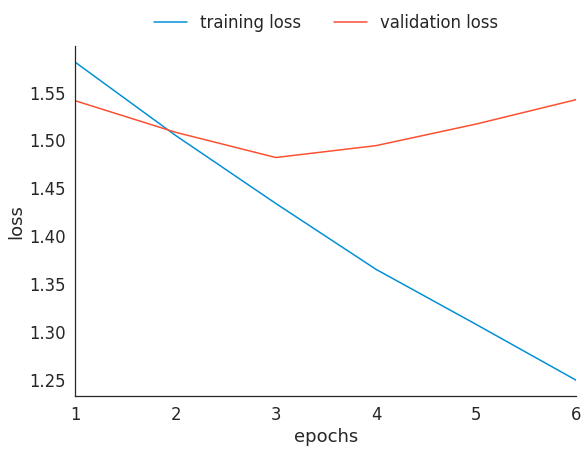

In [27]:
plot_history(history, metrics='loss', val_metrics='val_loss')

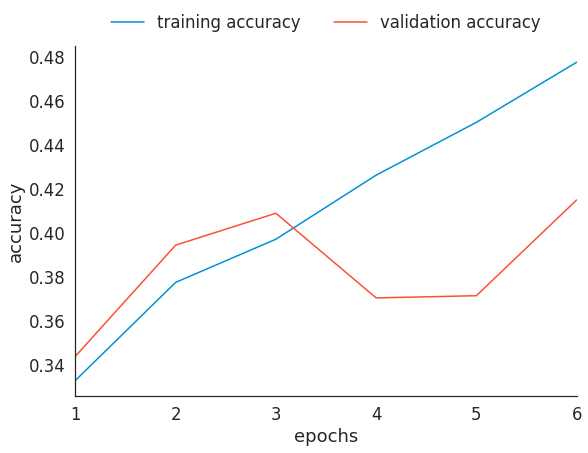

In [28]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

## Evaluate

In [44]:
eval = model.evaluate(X_test_sequence, y_test_encode)

print(f'loss\t: {eval[0]:.3f}')
print(f'acc\t: {eval[1]:.3f}')

63/63 [==============================] - 0s 6ms/step - loss: 1.4622 - accuracy: 0.4065
loss	: 1.462
acc	: 0.407


# Model with LSTM

## Model Architecture

In [45]:
int_sequences_input = layers.Input(shape=(None,), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(layers.LSTM(64))(embedded_sequences)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         4519500   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                           

## Compile

In [46]:
adam = Adam(learning_rate=0.005)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy']
              )

## Callbacks

In [47]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    restore_best_weights=True,
    verbose=1,
  )
]

## Fit

In [48]:
history = model.fit(X_train_sequence, y_train_encode, 
                    batch_size=128, epochs=20, 
                    validation_data=(X_val_sequence, y_val_encode),
                    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 9s 42ms/step - loss: 0.8676 - accuracy: 0.6833 - val_loss: 0.3688 - val_accuracy: 0.8725
Epoch 2/20
125/125 [==============================] - 5s 37ms/step - loss: 0.2640 - accuracy: 0.9007 - val_loss: 0.2365 - val_accuracy: 0.9060
Epoch 3/20
125/125 [==============================] - 5s 38ms/step - loss: 0.1494 - accuracy: 0.9381 - val_loss: 0.1828 - val_accuracy: 0.9190
Epoch 4/20
125/125 [==============================] - 4s 32ms/step - loss: 0.1011 - accuracy: 0.9562 - val_loss: 0.1862 - val_accuracy: 0.9230
Epoch 5/20
125/125 [==============================] - 4s 31ms/step - loss: 0.0755 - accuracy: 0.9696 - val_loss: 0.1994 - val_accuracy: 0.9200
Epoch 6/20
125/125 [==============================] - 4s 32ms/step - loss: 0.0620 - accuracy: 0.9743 - val_loss: 0.2194 - val_accuracy: 0.9210
Epoch 6: early stopping


## History

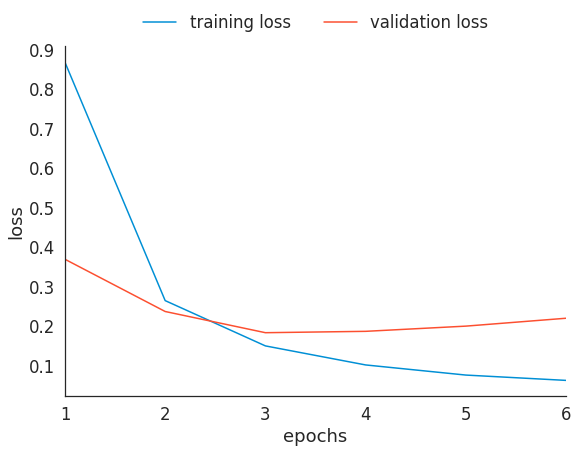

In [49]:
plot_history(history, metrics='loss', val_metrics='val_loss')

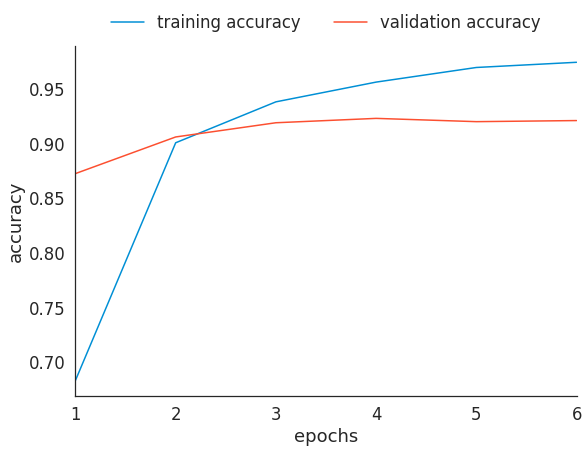

In [50]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

## Evaluate

In [51]:
eval = model.evaluate(X_test_sequence, y_test_encode)

print(f'loss\t: {eval[0]:.3f}')
print(f'acc\t: {eval[1]:.3f}')

63/63 [==============================] - 1s 12ms/step - loss: 0.1747 - accuracy: 0.9230
loss	: 0.175
acc	: 0.923


# Model with GRU

## Model Architecture

In [52]:
int_sequences_input = layers.Input(shape=(None,), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(layers.GRU(64))(embedded_sequences)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         4519500   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              140544    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 774       
                                                           

## Compile

In [53]:
adam = Adam(learning_rate=0.005)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy']
              )

## Callbacks

In [54]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    restore_best_weights=True,
    verbose=1,
  )
]

## Fit

In [55]:
history = model.fit(X_train_sequence, y_train_encode, 
                    batch_size=128, epochs=20, 
                    validation_data=(X_val_sequence, y_val_encode),
                    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 7s 33ms/step - loss: 0.7146 - accuracy: 0.7389 - val_loss: 0.2297 - val_accuracy: 0.9085
Epoch 2/20
125/125 [==============================] - 3s 26ms/step - loss: 0.1898 - accuracy: 0.9217 - val_loss: 0.1781 - val_accuracy: 0.9260
Epoch 3/20
125/125 [==============================] - 3s 26ms/step - loss: 0.1253 - accuracy: 0.9436 - val_loss: 0.1510 - val_accuracy: 0.9320
Epoch 4/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0947 - accuracy: 0.9571 - val_loss: 0.1571 - val_accuracy: 0.9325
Epoch 5/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0767 - accuracy: 0.9655 - val_loss: 0.1733 - val_accuracy: 0.9265
Epoch 6/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0676 - accuracy: 0.9701 - val_loss: 0.1713 - val_accuracy: 0.9335
Epoch 6: early stopping


## History

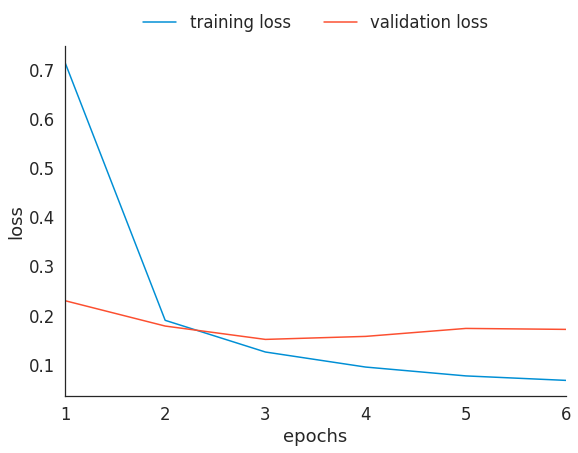

In [56]:
plot_history(history, metrics='loss', val_metrics='val_loss')

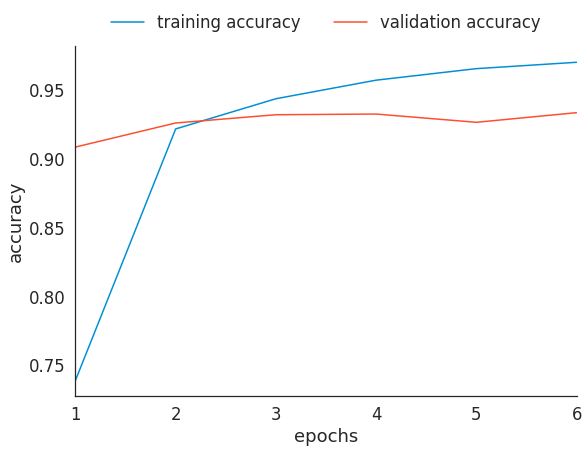

In [57]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

## Evaluate

In [58]:
eval = model.evaluate(X_test_sequence, y_test_encode)

print(f'loss\t: {eval[0]:.3f}')
print(f'acc\t: {eval[1]:.3f}')

63/63 [==============================] - 1s 11ms/step - loss: 0.1620 - accuracy: 0.9245
loss	: 0.162
acc	: 0.924


# Model with Conv1D

## Model Architecture

In [59]:
int_sequences_input = layers.Input(shape=(None,), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_sequences)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         4519500   
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         192128    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                           

## Compile

In [60]:
adam = Adam(learning_rate=0.005)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy']
              )

## Callbacks

In [61]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    restore_best_weights=True,
    verbose=1,
  )
]

## Fit

In [62]:
history = model.fit(X_train_sequence, y_train_encode, 
                    batch_size=128, epochs=20, 
                    validation_data=(X_val_sequence, y_val_encode),
                    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 2s 14ms/step - loss: 1.3715 - accuracy: 0.4812 - val_loss: 1.0934 - val_accuracy: 0.6310
Epoch 2/20
125/125 [==============================] - 2s 12ms/step - loss: 0.9021 - accuracy: 0.6808 - val_loss: 0.7428 - val_accuracy: 0.7500
Epoch 3/20
125/125 [==============================] - 1s 12ms/step - loss: 0.6447 - accuracy: 0.7747 - val_loss: 0.6078 - val_accuracy: 0.7810
Epoch 4/20
125/125 [==============================] - 2s 13ms/step - loss: 0.4806 - accuracy: 0.8343 - val_loss: 0.5035 - val_accuracy: 0.8240
Epoch 5/20
125/125 [==============================] - 2s 12ms/step - loss: 0.3450 - accuracy: 0.8810 - val_loss: 0.4766 - val_accuracy: 0.8265
Epoch 6/20
125/125 [==============================] - 2s 12ms/step - loss: 0.2524 - accuracy: 0.9167 - val_loss: 0.4311 - val_accuracy: 0.8435
Epoch 7/20
125/125 [==============================] - 1s 12ms/step - loss: 0.1737 - accuracy: 0.9435 - val_loss: 0.4623 - val_accuracy: 0.8480

## History

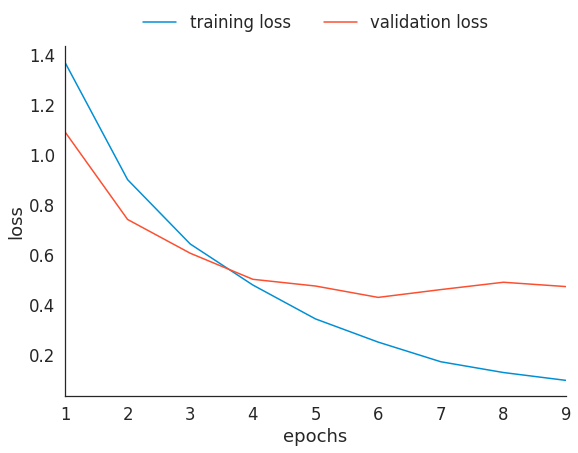

In [63]:
plot_history(history, metrics='loss', val_metrics='val_loss')

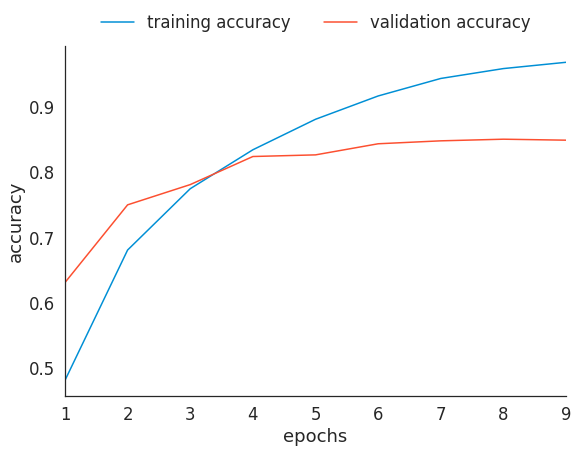

In [64]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

## Evaluate

In [65]:
eval = model.evaluate(X_test_sequence, y_test_encode)

print(f'loss\t: {eval[0]:.3f}')
print(f'acc\t: {eval[1]:.3f}')

63/63 [==============================] - 0s 4ms/step - loss: 0.4485 - accuracy: 0.8545
loss	: 0.449
acc	: 0.854


# Model Experiment

## Model Architecture

In [73]:
int_sequences_input = layers.Input(shape=(None,), dtype='int64')
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(embedded_sequences)
x = layers.Bidirectional(layers.GRU(64))(embedded_sequences)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         4519500   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              140544    
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                           

## Compile

In [74]:
adam = Adam(learning_rate=0.0025)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy']
              )

## Callbacks

In [75]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    restore_best_weights=True,
    verbose=1,
  )
]

## Fit

In [76]:
history = model.fit(X_train_sequence, y_train_encode, 
                    batch_size=128, epochs=20, 
                    validation_data=(X_val_sequence, y_val_encode),
                    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 7s 36ms/step - loss: 0.9472 - accuracy: 0.6586 - val_loss: 0.3440 - val_accuracy: 0.8760
Epoch 2/20
125/125 [==============================] - 4s 32ms/step - loss: 0.2819 - accuracy: 0.8949 - val_loss: 0.2122 - val_accuracy: 0.9140
Epoch 3/20
125/125 [==============================] - 3s 26ms/step - loss: 0.1701 - accuracy: 0.9298 - val_loss: 0.1612 - val_accuracy: 0.9295
Epoch 4/20
125/125 [==============================] - 3s 26ms/step - loss: 0.1222 - accuracy: 0.9453 - val_loss: 0.1911 - val_accuracy: 0.9230
Epoch 5/20
125/125 [==============================] - 3s 26ms/step - loss: 0.1000 - accuracy: 0.9541 - val_loss: 0.1571 - val_accuracy: 0.9285
Epoch 6/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0841 - accuracy: 0.9606 - val_loss: 0.1711 - val_accuracy: 0.9290
Epoch 7/20
125/125 [==============================] - 3s 26ms/step - loss: 0.0741 - accuracy: 0.9646 - val_loss: 0.2244 - val_accuracy: 0.9205

## History

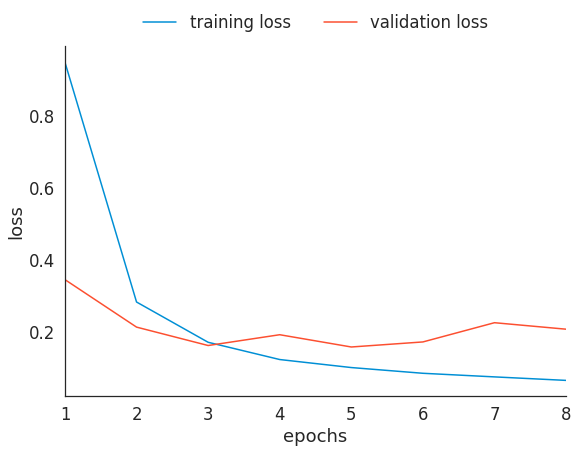

In [77]:
plot_history(history, metrics='loss', val_metrics='val_loss')

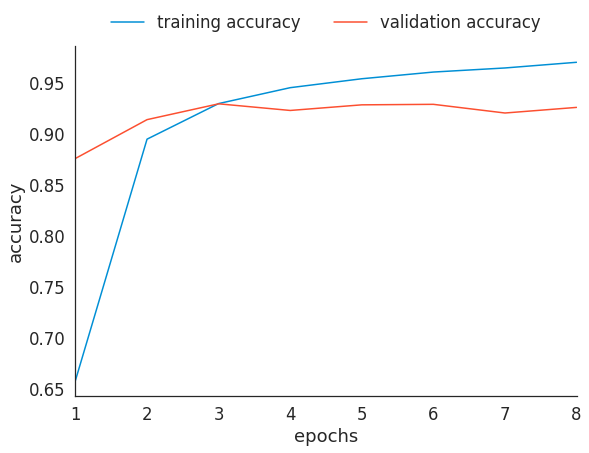

In [78]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

## Evaluate

In [79]:
eval = model.evaluate(X_test_sequence, y_test_encode)

print(f'loss\t: {eval[0]:.3f}')
print(f'acc\t: {eval[1]:.3f}')

63/63 [==============================] - 1s 12ms/step - loss: 0.1616 - accuracy: 0.9270
loss	: 0.162
acc	: 0.927


# References

Keras Documentation. "Using pre-trained word embeddings". [source](https://keras.io/examples/nlp/pretrained_word_embeddings/)